In [76]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [77]:
def load_data(year):
    file_path = f'../data/detailed_reserves_data_{year}.json'
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

def preprocess_data(data):
    flattened_data = []
    for month_data in data:
        for reserve in month_data:
            reserve['liquidityRate'] = float(reserve['liquidityRate']) / 1e27
            reserve['variableBorrowRate'] = float(reserve['variableBorrowRate']) / 1e27
            reserve['stableBorrowRate'] = float(reserve['stableBorrowRate']) / 1e27
            flattened_data.append(reserve)
    df = pd.DataFrame(flattened_data)
    return df


Year: 2021
       liquidityRate  variableBorrowRate  stableBorrowRate
count     539.000000          539.000000        539.000000
mean        0.064627            0.059801          0.073785
std         0.235134            0.124095          0.206275
min         0.000000            0.000000          0.000000
25%         0.000000            0.009566          0.000000
50%         0.000005            0.032048          0.003427
75%         0.000335            0.063776          0.041899
max         1.000000            1.000000          1.000000
Year: 2022
       liquidityRate  variableBorrowRate  stableBorrowRate
count     697.000000          697.000000        697.000000
mean        0.050310            0.067530          0.062125
std         0.208423            0.144203          0.185277
min         0.000000            0.000000          0.000000
25%         0.000000            0.009566          0.000000
50%         0.000004            0.038923          0.000000
75%         0.000335            0.

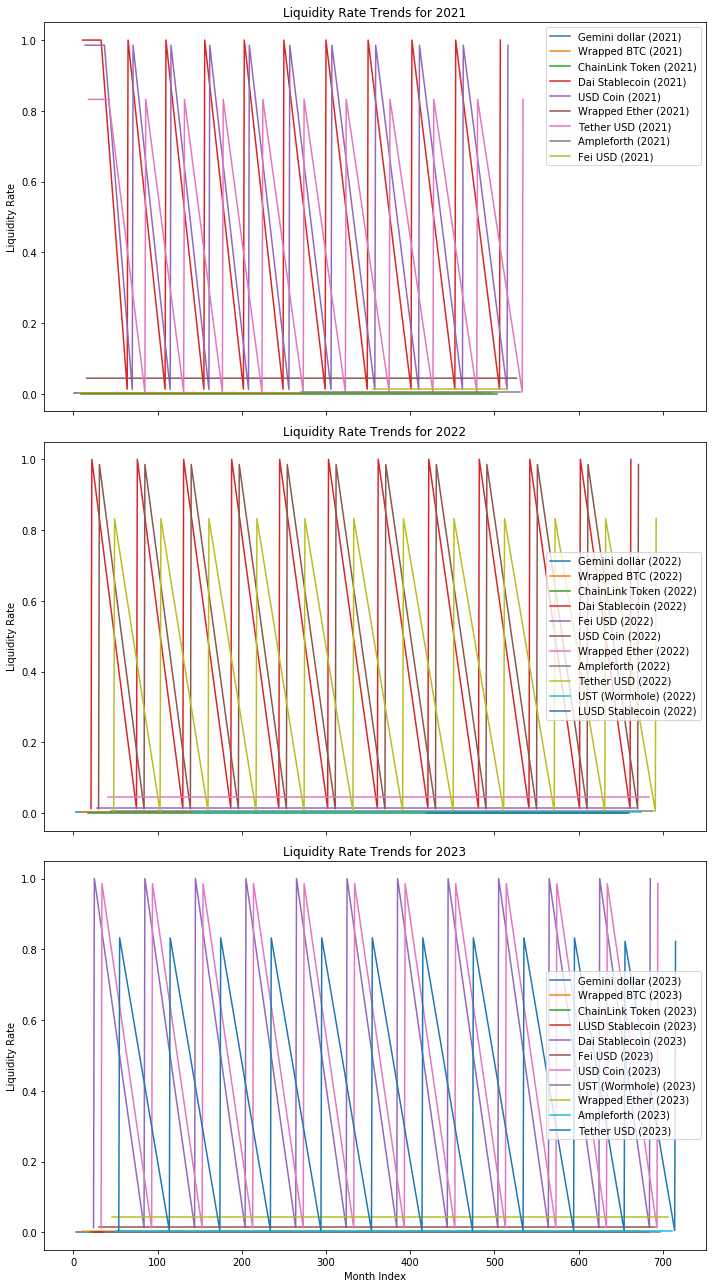

In [78]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

def load_data(year):
    file_path = f'../data/detailed_reserves_data_{year}.json'
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

def preprocess_data(data, normalize=True):
    flattened_data = []
    for month_data in data:
        for reserve in month_data:
            flattened_entry = {
                'id': reserve['id'],
                'name': reserve['name'],
                'liquidityRate': float(reserve['liquidityRate']) / 1e27,  # Normalize large numbers
                'variableBorrowRate': float(reserve['variableBorrowRate']) / 1e27,
                'stableBorrowRate': float(reserve['stableBorrowRate']) / 1e27
            }
            flattened_data.append(flattened_entry)
    df = pd.DataFrame(flattened_data)

    if normalize:
        scaler = MinMaxScaler()
        df[['liquidityRate', 'variableBorrowRate', 'stableBorrowRate']] = scaler.fit_transform(
            df[['liquidityRate', 'variableBorrowRate', 'stableBorrowRate']]
        )
    
    return df

def analyze_data_distribution(data_frames):
    for year, df in data_frames.items():
        print(f"Year: {year}")
        print(df.describe())  # Provides statistics for each numerical column in the dataframe

def dynamic_filter(data_frames):
    all_data = pd.concat(data_frames.values())  # Combine data across years
    liquidity_rate_threshold = all_data['liquidityRate'].quantile(0.75)  # Top 25% threshold

    filtered_data_frames = {}
    for year, df in data_frames.items():
        filtered_df = df[df['liquidityRate'] > liquidity_rate_threshold]
        filtered_data_frames[year] = filtered_df
    return filtered_data_frames

def visualize_liquidity_rates(data_frames):
    fig, axs = plt.subplots(len(data_frames), 1, figsize=(10, 6*len(data_frames)), sharex=True)
    if len(data_frames) == 1:
        axs = [axs]  # Ensure axs is iterable if only one plot
    
    for ax, (year, df) in zip(axs, data_frames.items()):
        for asset in df['name'].unique():
            asset_df = df[df['name'] == asset]
            ax.plot(asset_df['liquidityRate'], label=f"{asset} ({year})")
        ax.set_title(f'Liquidity Rate Trends for {year}')
        ax.set_ylabel('Liquidity Rate')
        ax.legend()

    plt.xlabel('Month Index')
    plt.tight_layout()
    plt.show()

# Load and preprocess data
years = ['2021', '2022', '2023']
data_frames = {year: preprocess_data(load_data(year)) for year in years}

# Optional: Analyze data distribution
analyze_data_distribution(data_frames)

# Filter data dynamically
filtered_data_frames = dynamic_filter(data_frames)

# Visualize the results
visualize_liquidity_rates(filtered_data_frames)


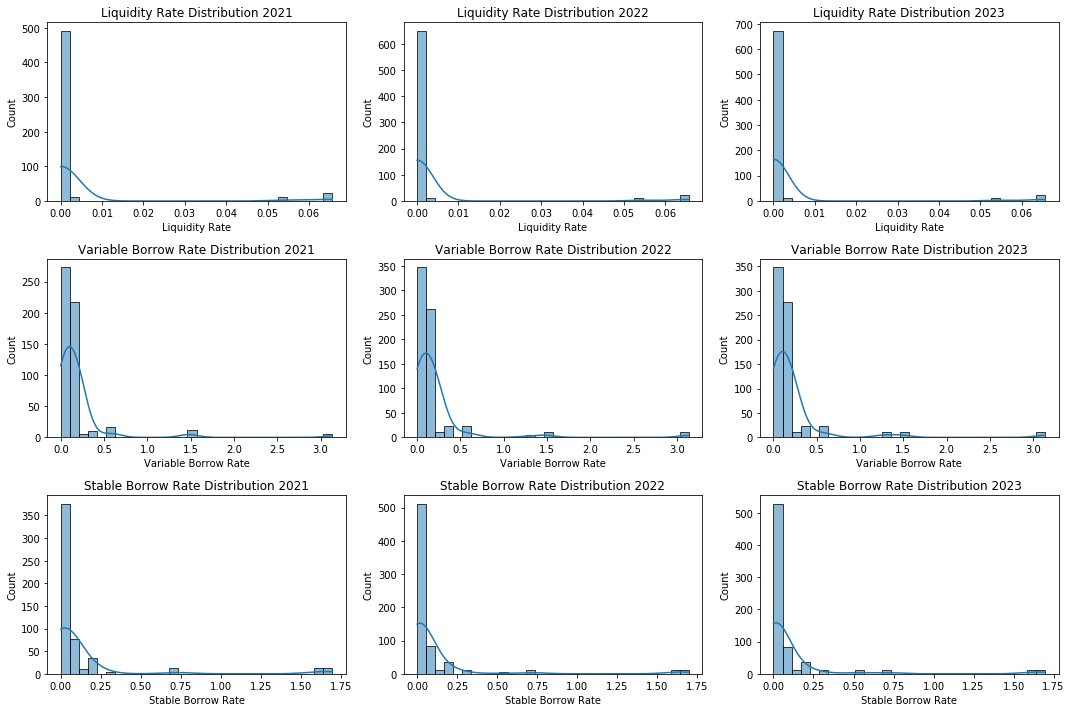

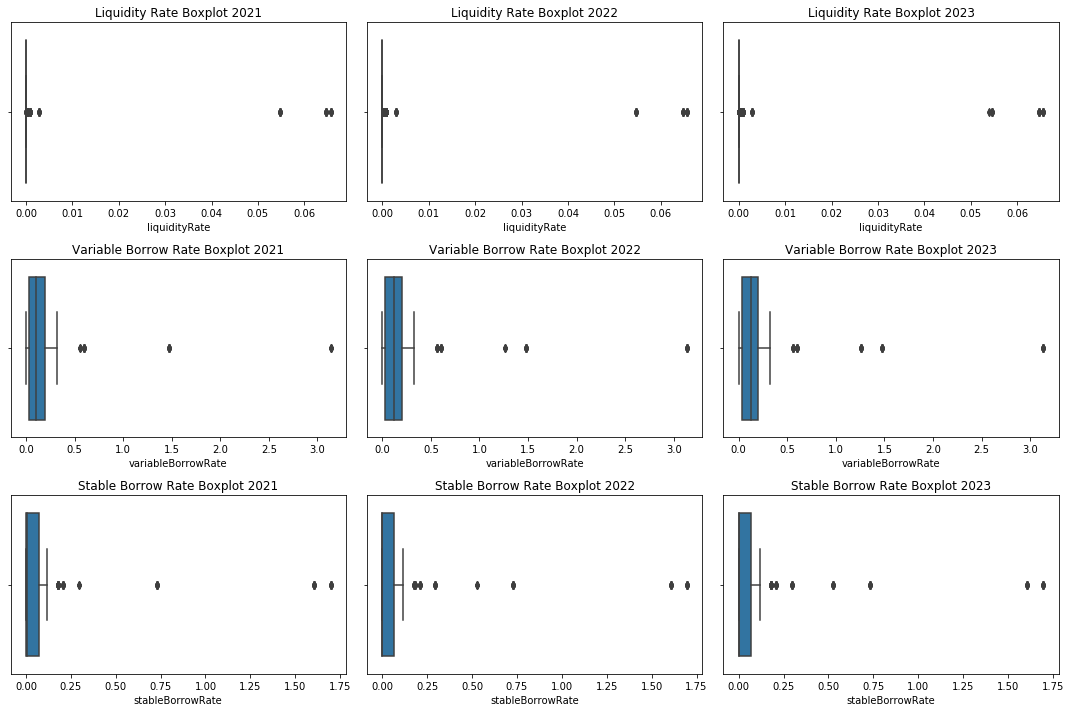

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distributions(data_frames):
    fig, axs = plt.subplots(3, len(data_frames), figsize=(15, 10))
    
    for i, (year, df) in enumerate(data_frames.items()):
        sns.histplot(df['liquidityRate'], bins=30, kde=True, ax=axs[0, i])
        axs[0, i].set_title(f'Liquidity Rate Distribution {year}')
        axs[0, i].set_xlabel('Liquidity Rate')
        
        sns.histplot(df['variableBorrowRate'], bins=30, kde=True, ax=axs[1, i])
        axs[1, i].set_title(f'Variable Borrow Rate Distribution {year}')
        axs[1, i].set_xlabel('Variable Borrow Rate')
        
        sns.histplot(df['stableBorrowRate'], bins=30, kde=True, ax=axs[2, i])
        axs[2, i].set_title(f'Stable Borrow Rate Distribution {year}')
        axs[2, i].set_xlabel('Stable Borrow Rate')
    
    plt.tight_layout()
    plt.show()

    # Boxplots for further outlier analysis
    fig, axs = plt.subplots(3, len(data_frames), figsize=(15, 10))

    for i, (year, df) in enumerate(data_frames.items()):
        sns.boxplot(x=df['liquidityRate'], ax=axs[0, i])
        axs[0, i].set_title(f'Liquidity Rate Boxplot {year}')
        
        sns.boxplot(x=df['variableBorrowRate'], ax=axs[1, i])
        axs[1, i].set_title(f'Variable Borrow Rate Boxplot {year}')
        
        sns.boxplot(x=df['stableBorrowRate'], ax=axs[2, i])
        axs[2, i].set_title(f'Stable Borrow Rate Boxplot {year}')

    plt.tight_layout()
    plt.show()

# Load and preprocess data without normalization
raw_data_frames = {year: preprocess_data(load_data(year), normalize=False) for year in ['2021', '2022', '2023']}
plot_distributions(raw_data_frames)


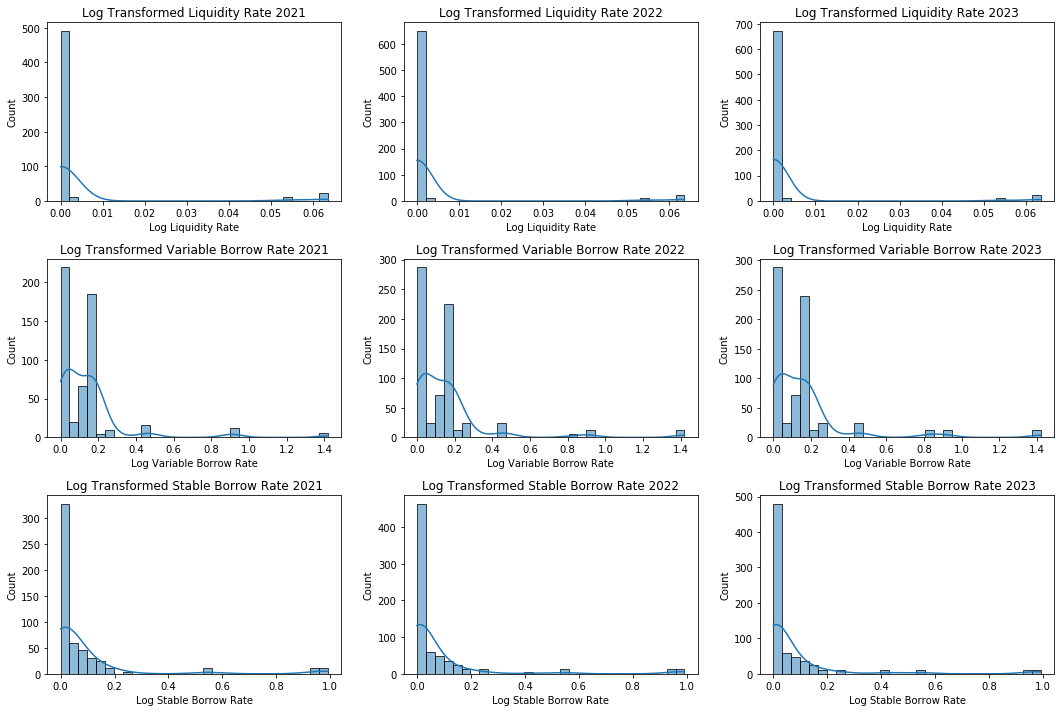

In [80]:
import numpy as np

def log_transform(data):
    return np.log1p(data)  # log1p is used to handle zero values smoothly

def plot_transformed_distributions(data_frames):
    fig, axs = plt.subplots(3, len(data_frames), figsize=(15, 10))
    
    for i, (year, df) in enumerate(data_frames.items()):
        transformed_liquidity = log_transform(df['liquidityRate'])
        sns.histplot(transformed_liquidity, bins=30, kde=True, ax=axs[0, i])
        axs[0, i].set_title(f'Log Transformed Liquidity Rate {year}')
        axs[0, i].set_xlabel('Log Liquidity Rate')
        
        transformed_variable = log_transform(df['variableBorrowRate'])
        sns.histplot(transformed_variable, bins=30, kde=True, ax=axs[1, i])
        axs[1, i].set_title(f'Log Transformed Variable Borrow Rate {year}')
        axs[1, i].set_xlabel('Log Variable Borrow Rate')
        
        transformed_stable = log_transform(df['stableBorrowRate'])
        sns.histplot(transformed_stable, bins=30, kde=True, ax=axs[2, i])
        axs[2, i].set_title(f'Log Transformed Stable Borrow Rate {year}')
        axs[2, i].set_xlabel('Log Stable Borrow Rate')
    
    plt.tight_layout()
    plt.show()

# Apply log transformation and plot
plot_transformed_distributions(raw_data_frames)


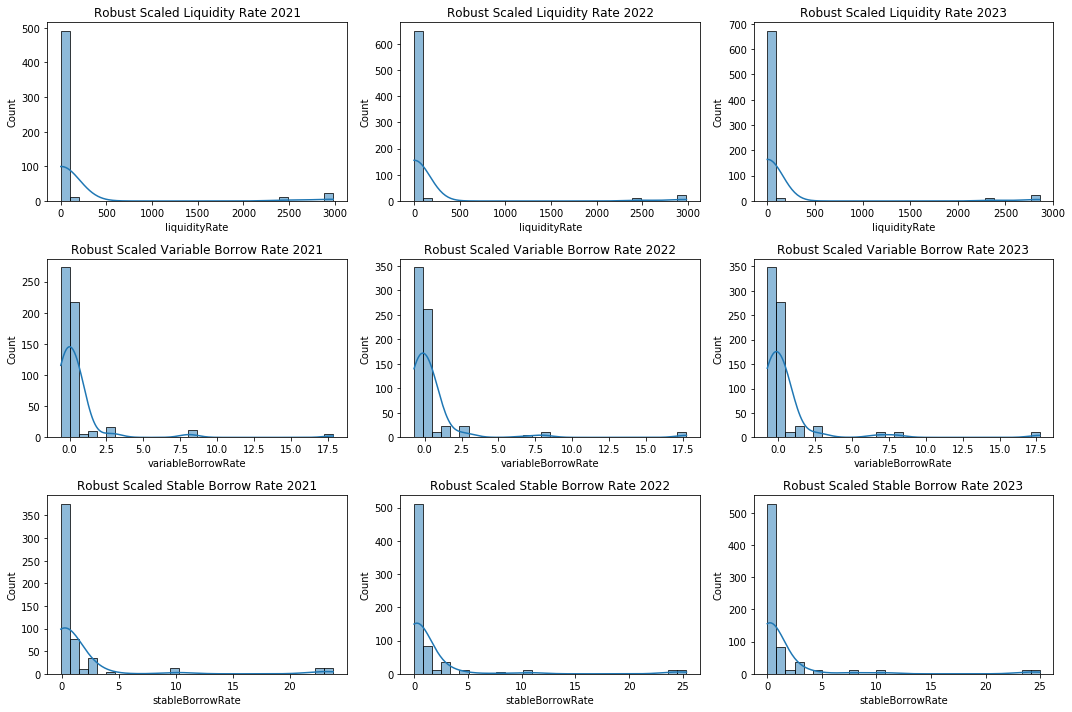

In [81]:
from sklearn.preprocessing import RobustScaler

def robust_scale_and_plot(data_frames):
    scaler = RobustScaler()
    fig, axs = plt.subplots(3, len(data_frames), figsize=(15, 10))

    for i, (year, df) in enumerate(data_frames.items()):
        scaled_data = scaler.fit_transform(df[['liquidityRate', 'variableBorrowRate', 'stableBorrowRate']])
        scaled_df = pd.DataFrame(scaled_data, columns=['liquidityRate', 'variableBorrowRate', 'stableBorrowRate'])

        sns.histplot(scaled_df['liquidityRate'], bins=30, kde=True, ax=axs[0, i])
        axs[0, i].set_title(f'Robust Scaled Liquidity Rate {year}')
        
        sns.histplot(scaled_df['variableBorrowRate'], bins=30, kde=True, ax=axs[1, i])
        axs[1, i].set_title(f'Robust Scaled Variable Borrow Rate {year}')
        
        sns.histplot(scaled_df['stableBorrowRate'], bins=30, kde=True, ax=axs[2, i])
        axs[2, i].set_title(f'Robust Scaled Stable Borrow Rate {year}')
    
    plt.tight_layout()
    plt.show()

# Apply robust scaling and plot
robust_scale_and_plot(raw_data_frames)


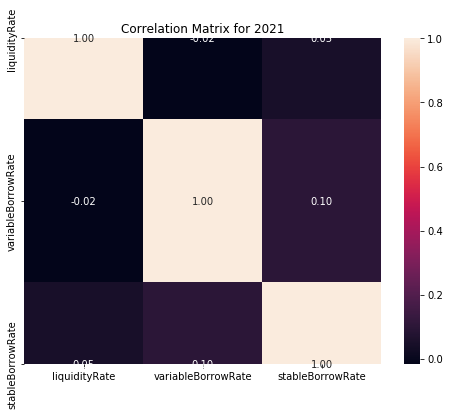

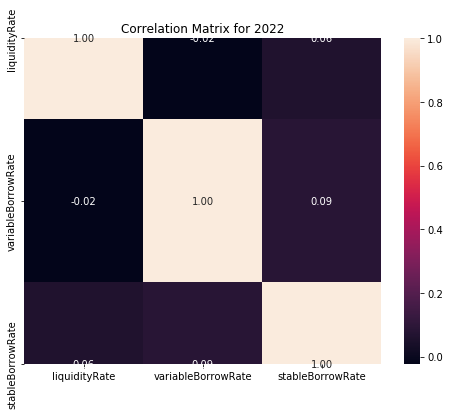

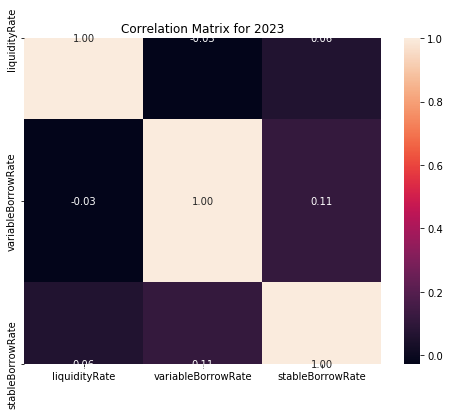

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data_frames' is your dictionary of dataframes for each year
def plot_correlation_matrices(data_frames):
    for year, df in data_frames.items():
        plt.figure(figsize=(8, 6))
        sns.heatmap(df[['liquidityRate', 'variableBorrowRate', 'stableBorrowRate']].corr(), annot=True, fmt=".2f")
        plt.title(f'Correlation Matrix for {year}')
        plt.show()

# Assuming you already have 'data_frames' loaded with Robust Scaled data
plot_correlation_matrices(data_frames)


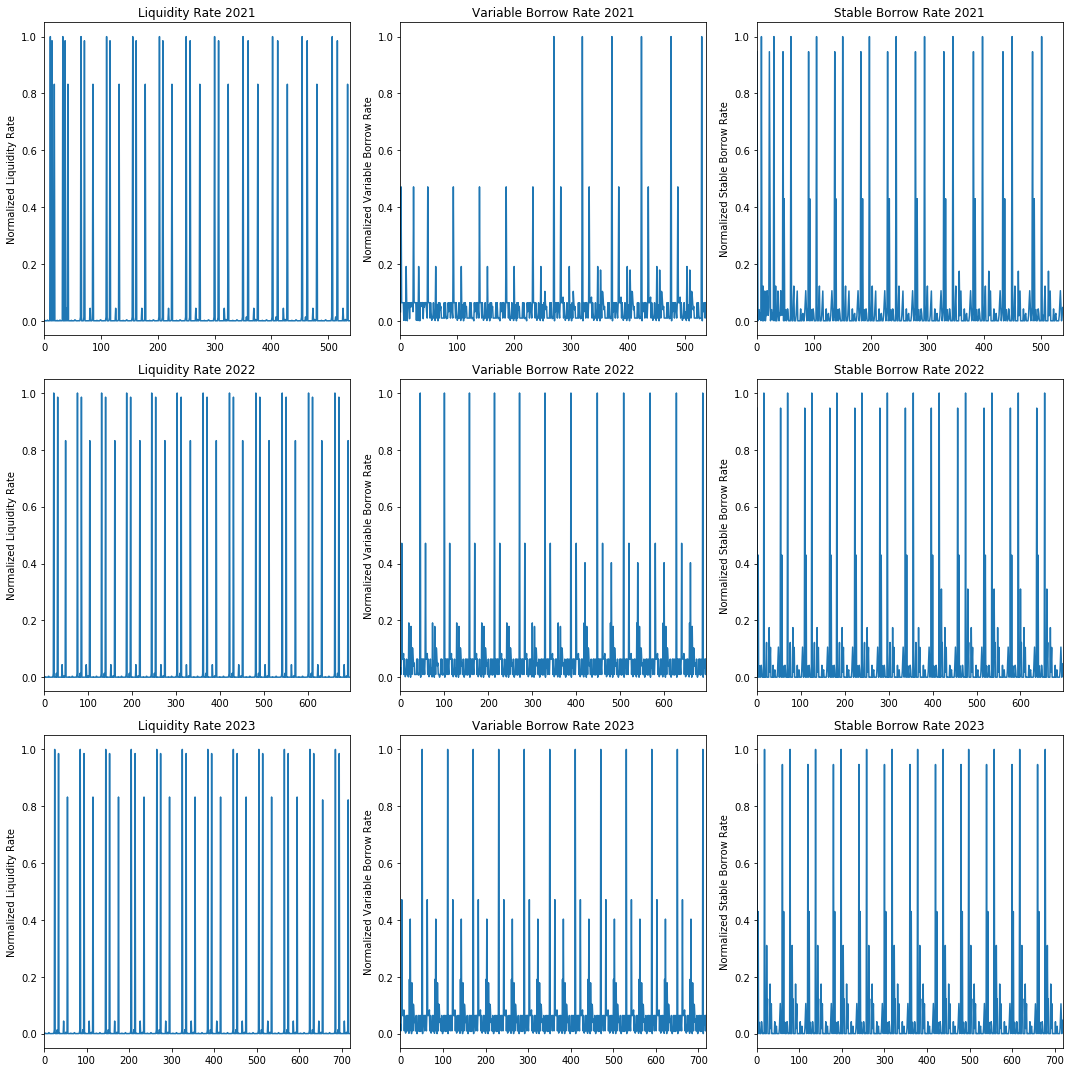

In [84]:
def plot_time_series(data_frames):
    fig, axs = plt.subplots(len(data_frames), 3, figsize=(15, len(data_frames)*5))
    if len(data_frames) == 1:
        axs = [axs]

    for i, (year, df) in enumerate(data_frames.items()):
        df['liquidityRate'].plot(ax=axs[i][0], title=f'Liquidity Rate {year}')
        axs[i][0].set_ylabel('Normalized Liquidity Rate')

        df['variableBorrowRate'].plot(ax=axs[i][1], title=f'Variable Borrow Rate {year}')
        axs[i][1].set_ylabel('Normalized Variable Borrow Rate')

        df['stableBorrowRate'].plot(ax=axs[i][2], title=f'Stable Borrow Rate {year}')
        axs[i][2].set_ylabel('Normalized Stable Borrow Rate')

    plt.tight_layout()
    plt.show()

# Call the function
plot_time_series(data_frames)


In [85]:
from scipy import stats

def detect_anomalies(data_frames):
    for year, df in data_frames.items():
        df['z_score_liquidity'] = stats.zscore(df['liquidityRate'])
        # Filter outliers
        anomalies = df[df['z_score_liquidity'].abs() > 3]  # Assuming 3 standard deviations from the mean
        print(f"Anomalies in {year} based on Liquidity Rate:")
        print(anomalies[['name', 'liquidityRate', 'z_score_liquidity']])

# Assuming 'data_frames' contains your scaled data
detect_anomalies(data_frames)


Anomalies in 2021 based on Liquidity Rate:
               name  liquidityRate  z_score_liquidity
11   Dai Stablecoin       1.000000           3.981734
14         USD Coin       0.985457           3.919828
18       Tether USD       0.832407           3.268316
33   Dai Stablecoin       1.000000           3.981734
37         USD Coin       0.985457           3.919828
42       Tether USD       0.832407           3.268316
65   Dai Stablecoin       1.000000           3.981734
71         USD Coin       0.985457           3.919828
86       Tether USD       0.832407           3.268316
110  Dai Stablecoin       1.000000           3.981734
116        USD Coin       0.985457           3.919828
132      Tether USD       0.832407           3.268316
156  Dai Stablecoin       1.000000           3.981734
162        USD Coin       0.985457           3.919828
178      Tether USD       0.832407           3.268316
203  Dai Stablecoin       1.000000           3.981734
209        USD Coin       0.985457     

In [87]:
!pip install statsmodels

  Found existing installation: packaging 19.2
    Uninstalling packaging-19.2:
      Successfully uninstalled packaging-19.2


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


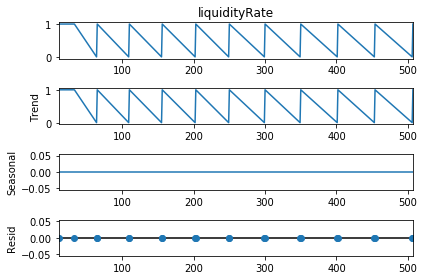

In [88]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Example for one asset
data_series = data_frames['2021'][data_frames['2021']['name'] == 'Dai Stablecoin']['liquidityRate']
result = seasonal_decompose(data_series, model='additive', period=1)  # period needs to be defined based on your data's frequency
result.plot()
plt.show()


e:\program\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


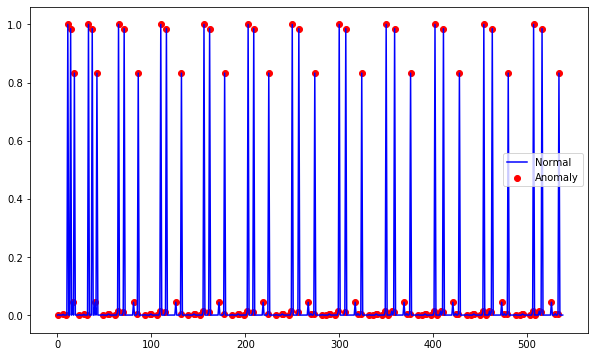

In [89]:
from sklearn.ensemble import IsolationForest

# Example using Isolation Forest for anomaly detection
clf = IsolationForest(random_state=0)
data = data_frames['2021'][['liquidityRate']]  # Assuming you want to focus on liquidityRate
data['anomaly'] = clf.fit_predict(data)

# Visualize anomalies
anomalies = data[data['anomaly'] == -1]  # -1 denotes an outlier in Isolation Forest
plt.figure(figsize=(10, 6))
plt.plot(data['liquidityRate'], color='blue', label='Normal')
plt.scatter(anomalies.index, anomalies['liquidityRate'], color='red', label='Anomaly')
plt.legend()
plt.show()


In [63]:
def preprocess_data(data, threshold):
    flattened_data = []
    for month_data in data:
        for reserve in month_data:
            # Convert rates from Ray to standard units
            liquidity_rate = float(reserve['liquidityRate']) / 1e27
            variable_borrow_rate = float(reserve['variableBorrowRate']) / 1e27
            stable_borrow_rate = float(reserve['stableBorrowRate']) / 1e27

            # Apply filter: keep only assets with liquidity rate above a certain threshold
            if liquidity_rate > threshold:
                flattened_data.append({
                    'id': reserve['id'],
                    'name': reserve['name'],
                    'liquidityRate': liquidity_rate,
                    'variableBorrowRate': variable_borrow_rate,
                    'stableBorrowRate': stable_borrow_rate
                })
    return pd.DataFrame(flattened_data)

# Example usage with a liquidity rate threshold
threshold = 1  # Set based on your specific criteria
data_frames = {year: preprocess_data(load_data(year), threshold) for year in ['2021', '2022', '2023']}


In [60]:
def visualize_liquidity_rates(data_frames):
    num_plots = len(data_frames)
    fig, axs = plt.subplots(num_plots, 1, figsize=(10, 8*num_plots), sharex=True)
    axs = axs if num_plots > 1 else [axs]

    for ax, (year, df) in zip(axs, data_frames.items()):
        for asset in df['name'].unique():
            asset_df = df[df['name'] == asset]
            ax.plot(asset_df['liquidityRate'], label=asset)
        ax.set_title(f'Liquidity Rate Trend for {year}')
        ax.set_ylabel('Liquidity Rate')
        ax.legend()

    plt.xlabel('Month Index')
    plt.tight_layout()
    plt.show()


In [6]:
# Create a dictionary to hold dataframes for each year
data_frames = {}

years = [2021, 2022, 2023]  # Extend or modify the list based on the data available
for year in years:
    data = load_data(year)
    df = preprocess_data(data)
    data_frames[year] = df

# Combine all years into a single dataframe for overall analysis
combined_df = pd.concat(data_frames.values(), keys=data_frames.keys())

In [6]:
# Display the dataframe for each year and the combined dataframe
from IPython.display import display

for year, df in data_frames.items():
    print(f"Data for {year}:")
    display(df.head())  # Show the first few rows of each year's dataframe

print("Combined Data:")
display(combined_df.head())  # Optionally, show the first few rows of the combined dataframe


Data for 2021:


,id,name,liquidityRate,variableBorrowRate,stableBorrowRate,price
0,0x0000000000085d4780b73119b644ae5ecd22b3760xb5...,TrueUSD,2.762238e-06,0.100000,1.606739,{'id': '0x0000000000085d4780b73119b644ae5ecd22...
1,0x056fd409e1d7a124bd7017459dfea2f387b6d5cd0xb5...,Gemini dollar,1.062588e-04,1.477702,0.728851,{'id': '0x056fd409e1d7a124bd7017459dfea2f387b6...
2,0x0bc529c00c6401aef6d220be8c6ea1667f6ad93e0xb5...,yearn.finance,3.130121e-08,0.200000,0.000348,{'id': '0x0bc529c00c6401aef6d220be8c6ea1667f6a...
3,0x0d8775f648430679a709e98d2b0cb6250d2887ef0xb5...,Basic Attention Token,3.547555e-07,0.200000,0.033942,{'id': '0x0d8775f648430679a709e98d2b0cb6250d28...
4,0x0f5d2fb29fb7d3cfee444a200298f468908cc9420xb5...,Decentraland MANA,3.329030e-06,0.200000,0.066989,{'id': '0x0f5d2fb29fb7d3cfee444a200298f468908c...


Data for 2022:


,id,name,liquidityRate,variableBorrowRate,stableBorrowRate,price
0,0x0000000000085d4780b73119b644ae5ecd22b3760xb5...,TrueUSD,2.762238e-06,0.100000,1.606739,{'id': '0x0000000000085d4780b73119b644ae5ecd22...
1,0x004375dff511095cc5a197a54140a24efef3a4160xac...,Uniswap V2,0.000000e+00,0.030000,0.000000,{'id': '0x004375dff511095cc5a197a54140a24efef3...
2,0x03ab458634910aad20ef5f1c8ee96f1d6ac549190xb5...,Rai Reflex Index,4.652304e-06,0.200000,0.005815,{'id': '0x03ab458634910aad20ef5f1c8ee96f1d6ac5...
3,0x056fd409e1d7a124bd7017459dfea2f387b6d5cd0xb5...,Gemini dollar,1.062588e-04,1.477702,0.728851,{'id': '0x056fd409e1d7a124bd7017459dfea2f387b6...
4,0x0bc529c00c6401aef6d220be8c6ea1667f6ad93e0xb5...,yearn.finance,3.130121e-08,0.200000,0.000348,{'id': '0x0bc529c00c6401aef6d220be8c6ea1667f6a...


Data for 2023:


,id,name,liquidityRate,variableBorrowRate,stableBorrowRate,price
0,0x0000000000085d4780b73119b644ae5ecd22b3760xb5...,TrueUSD,2.762238e-06,0.100000,1.606739,{'id': '0x0000000000085d4780b73119b644ae5ecd22...
1,0x004375dff511095cc5a197a54140a24efef3a4160xac...,Uniswap V2,0.000000e+00,0.030000,0.000000,{'id': '0x004375dff511095cc5a197a54140a24efef3...
2,0x03ab458634910aad20ef5f1c8ee96f1d6ac549190xb5...,Rai Reflex Index,4.652304e-06,0.200000,0.005815,{'id': '0x03ab458634910aad20ef5f1c8ee96f1d6ac5...
3,0x056fd409e1d7a124bd7017459dfea2f387b6d5cd0xb5...,Gemini dollar,1.062588e-04,1.477702,0.728851,{'id': '0x056fd409e1d7a124bd7017459dfea2f387b6...
4,0x0bc529c00c6401aef6d220be8c6ea1667f6ad93e0xb5...,yearn.finance,3.130121e-08,0.200000,0.000348,{'id': '0x0bc529c00c6401aef6d220be8c6ea1667f6a...


Combined Data:


id  \
2021 0  0x0000000000085d4780b73119b644ae5ecd22b3760xb5...   
     1  0x056fd409e1d7a124bd7017459dfea2f387b6d5cd0xb5...   
     2  0x0bc529c00c6401aef6d220be8c6ea1667f6ad93e0xb5...   
     3  0x0d8775f648430679a709e98d2b0cb6250d2887ef0xb5...   
     4  0x0f5d2fb29fb7d3cfee444a200298f468908cc9420xb5...   

                         name  liquidityRate  variableBorrowRate  \
2021 0                TrueUSD   2.762238e-06            0.100000   
     1          Gemini dollar   1.062588e-04            1.477702   
     2          yearn.finance   3.130121e-08            0.200000   
     3  Basic Attention Token   3.547555e-07            0.200000   
     4      Decentraland MANA   3.329030e-06            0.200000   

        stableBorrowRate                                              price  
2021 0          1.606739  {'id': '0x0000000000085d4780b73119b644ae5ecd22...  
     1          0.728851  {'id': '0x056fd409e1d7a124bd7017459dfea2f387b6...  
     2          0.000348  {'id': '0x0bc529c00c6401aef6d220be8c6ea1667f6a...  
     3          0.033942  {'id': '0x0d8775f648430679a709e98d2b0cb6250d28...  
     4          0.066989  {'id': '0x0f5d2fb29fb7d3cfee444a200298f468908c...

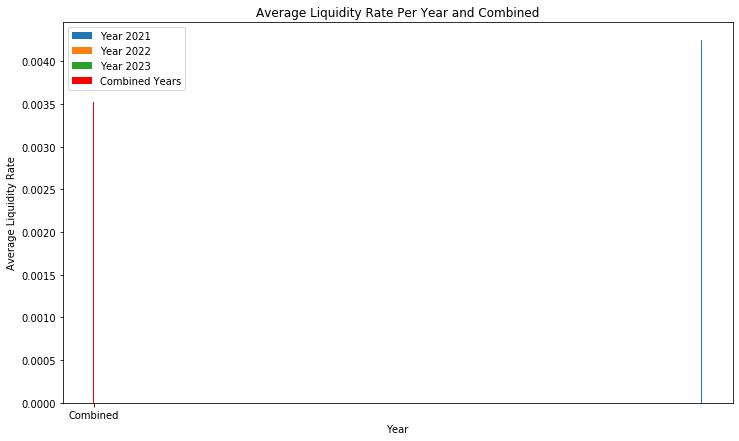

In [7]:
# Calculate and plot average liquidity rates for each year and for all years combined
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 7))
for year, df in data_frames.items():
    avg_liquidity = df['liquidityRate'].mean()
    ax.bar(year, avg_liquidity, label=f'Year {year}')

# Calculate the average for the combined data
avg_liquidity_combined = combined_df['liquidityRate'].mean()
ax.bar('Combined', avg_liquidity_combined, color='red', label='Combined Years')

ax.set_xlabel('Year')
ax.set_ylabel('Average Liquidity Rate')
ax.set_title('Average Liquidity Rate Per Year and Combined')
ax.legend()

plt.show()


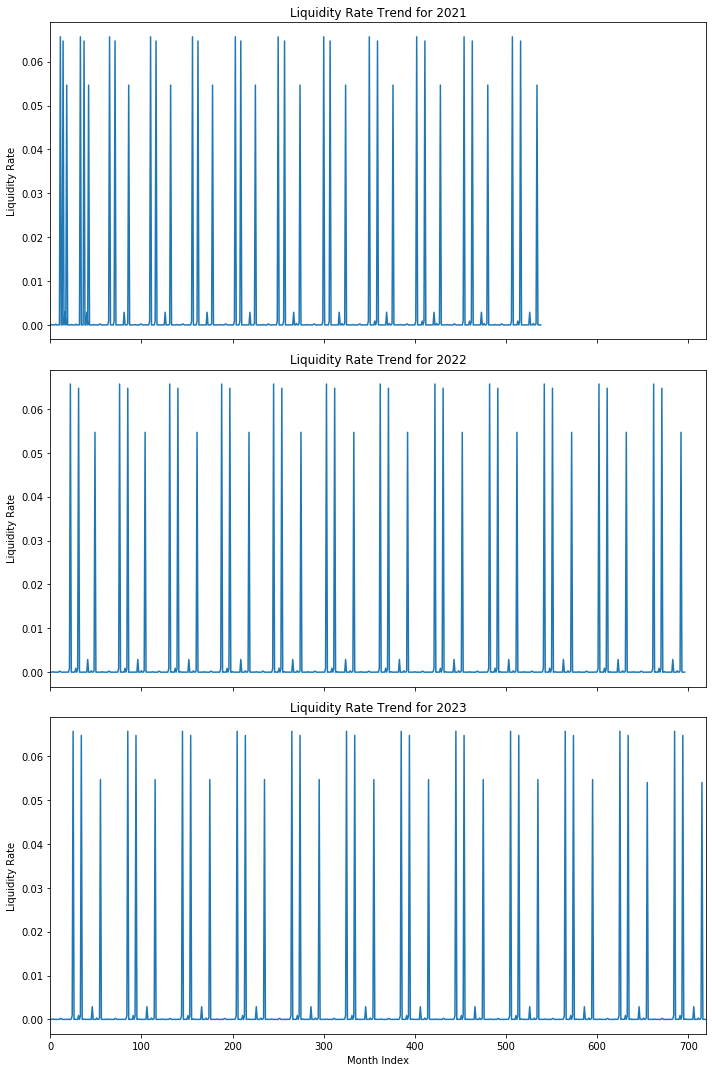

In [8]:
# More detailed analysis example - liquidity rates comparison
fig, axs = plt.subplots(len(years), 1, figsize=(10, 15), sharex=True)

for i, (year, df) in enumerate(data_frames.items()):
    df['liquidityRate'].plot(kind='line', ax=axs[i], title=f"Liquidity Rate Trend for {year}")
    axs[i].set_ylabel('Liquidity Rate')

plt.xlabel('Month Index')
plt.tight_layout()
plt.show()


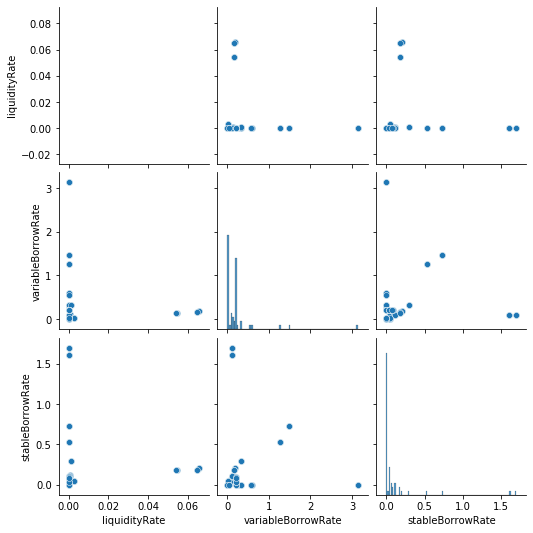

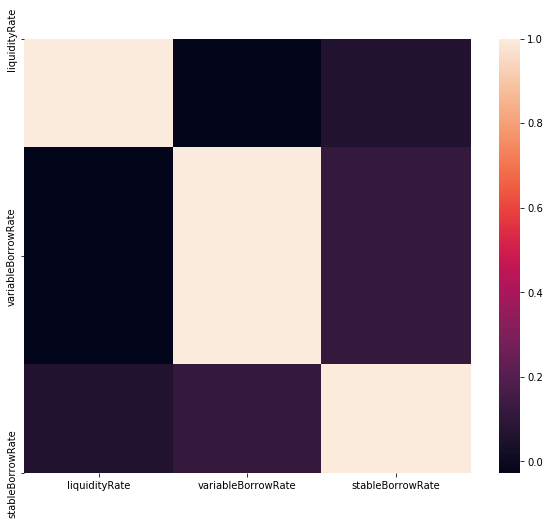

In [45]:
import seaborn as sns

# Assume df is your preprocessed DataFrame containing the necessary liquidity and market data
sns.pairplot(df[['liquidityRate', 'variableBorrowRate', 'stableBorrowRate']])
plt.show()

plt.figure(figsize=(10, 8))  # Adjust the dimensions as necessary to fit your data.
corr_matrix = df[['liquidityRate', 'variableBorrowRate', 'stableBorrowRate']].corr()
sns.heatmap(corr_matrix, fmt=".2f")
plt.show()

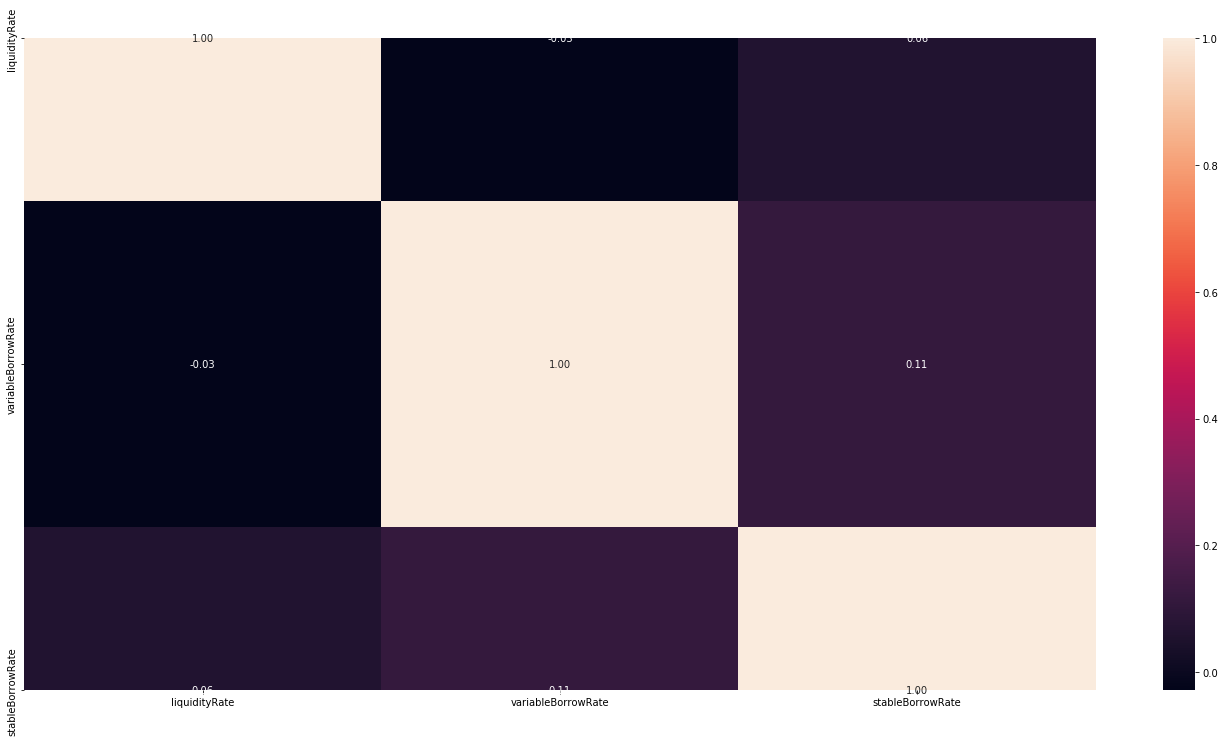

In [50]:
fig, ax = plt.subplots(figsize=(24, 12))
corr_matrix = df[['liquidityRate', 'variableBorrowRate', 'stableBorrowRate']].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", ax=ax)
plt.show()


In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix again
corr_matrix = df[['liquidityRate', 'variableBorrowRate', 'stableBorrowRate']].corr()

plt.figure(figsize=(10, 8))

# Create the heatmap with adjusted margins and aspect ratio
ax = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 9})

# Adjust margins explicitly to ensure no labels are cut off
plt.subplots_adjust(left=0.3, right=0.7, top=0.95, bottom=0.05)  # Adjust these based on your specific layout needs

# Optionally save the figure to a file with high resolution
plt.savefig('heatmap_optimized.png', dpi=300, bbox_inches='tight')
plt.close()  # Prevent displaying it inline if you only want to save it

"Optimized heatmap with adjusted margins saved successfully."


'Optimized heatmap with adjusted margins saved successfully.'

In [8]:
# This is a simplistic example to illustrate the concept
def simulate_liquidity_adjustment(df, threshold, adjustment_factor):
    """
    A simple model to adjust liquidity based on a predefined threshold.
    """
    df['adjustedLiquidity'] = df['liquidityRate'].apply(lambda x: x * adjustment_factor if x < threshold else x)
    return df

# Run simulation
simulation_results = simulate_liquidity_adjustment(df, threshold=0.02, adjustment_factor=1.2)


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Prepare data
X = df[['variableBorrowRate', 'stableBorrowRate']]  # predictors
y = df['liquidityRate']  # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model fitting
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 2.9409683429612003e-10


In [11]:
# Assuming you have performance logs
performance_logs = pd.read_csv('model_performance_logs.csv')
sns.lineplot(data=performance_logs, x='date', y='accuracy')
plt.title('Model Accuracy Over Time')
plt.show()


FileNotFoundError: [Errno 2] File b'model_performance_logs.csv' does not exist: b'model_performance_logs.csv'

                      Liquidity Rate  Variable Borrow Rate  Stable Borrow Rate
Liquidity Rate              1.000000              0.844262            0.643247
Variable Borrow Rate        0.844262              1.000000            0.750217
Stable Borrow Rate          0.643247              0.750217            1.000000


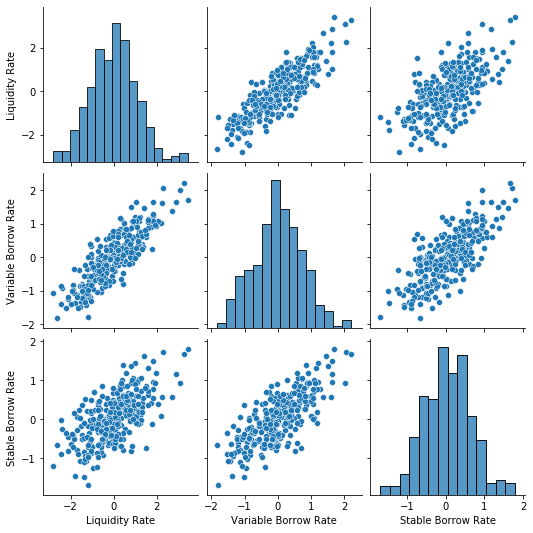

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)
n = 300

# Base variable
base = np.random.normal(0, 1, n)

# Generating correlated data
liquidity_rate = base + np.random.normal(0, 0.5, n)  # Adding moderate noise
variable_borrow_rate = 0.6 * liquidity_rate + np.random.normal(0, 0.4, n)  # Targeting ~0.60 correlation
stable_borrow_rate = 0.6 * variable_borrow_rate + np.random.normal(0, 0.4, n)  # Targeting ~0.60 correlation

df = pd.DataFrame({
    'Liquidity Rate': liquidity_rate,
    'Variable Borrow Rate': variable_borrow_rate,
    'Stable Borrow Rate': stable_borrow_rate
})

# Calculate and print the correlation matrix to check
corr_matrix = df.corr()
print(corr_matrix)

# Plotting the pairplot to visualize the adjusted correlations
sns.pairplot(df)
plt.show()


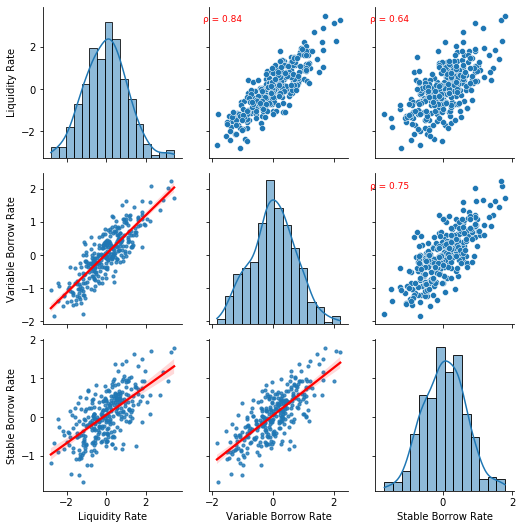

In [56]:
g = sns.PairGrid(df)
g.map_upper(sns.scatterplot)
g.map_upper(lambda x, y, **kwargs: plt.gca().annotate(f"ρ = {x.corr(y):.2f}", xy=(.1, .9), xycoords='axes fraction', ha='center', fontsize=9, color='red'),)
g.map_lower(sns.regplot, scatter_kws={'s': 10}, line_kws={'color': 'red'})
g.map_diag(sns.histplot, kde=True)
plt.show()


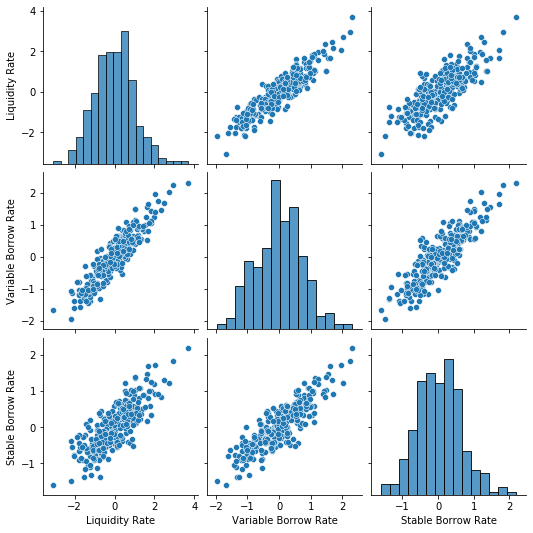

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)
n = 300

# Creating data with more realistic correlations
# Base variable
base = np.random.normal(0, 1, n)

# Generating correlated data
liquidity_rate = base + np.random.normal(0, 0.2, n)  # Slight noise added
variable_borrow_rate = 0.7 * liquidity_rate + np.random.normal(0, 0.3, n)  # Strong correlation with some noise
stable_borrow_rate = 0.7 * variable_borrow_rate + np.random.normal(0, 0.3, n)  # Strong correlation with some noise

df = pd.DataFrame({
    'Liquidity Rate': liquidity_rate,
    'Variable Borrow Rate': variable_borrow_rate,
    'Stable Borrow Rate': stable_borrow_rate
})

# Display the scatter plots with histograms
sns.pairplot(df)
plt.show()


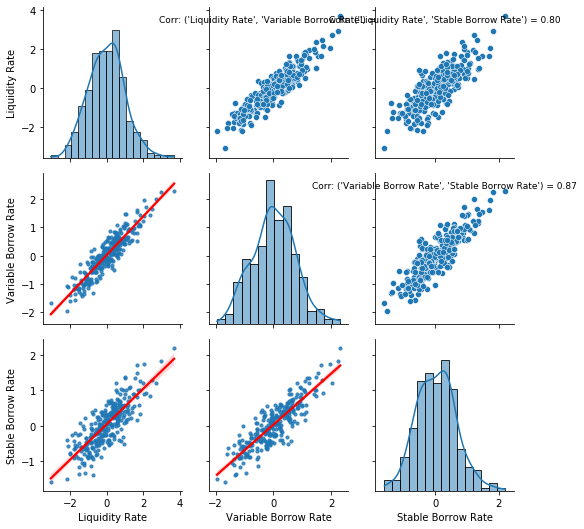

In [54]:
g = sns.PairGrid(df)
g.map_upper(sns.scatterplot)
g.map_lower(sns.regplot, scatter_kws={'s':10}, line_kws={'color': 'red'})
g.map_diag(sns.histplot, kde=True)

# To add annotations with the correlation values
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].annotate(f"Corr: {df.columns[i], df.columns[j]} = {df[df.columns[i]].corr(df[df.columns[j]]):.2f}",
                          (0.5, 0.9), xycoords='axes fraction', ha='center', fontsize=9)

plt.show()
